<a href="https://colab.research.google.com/github/tarasov001/bank_customers_churn/blob/main/bank_customers_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn Modeling.csv', index_col='RowNumber')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

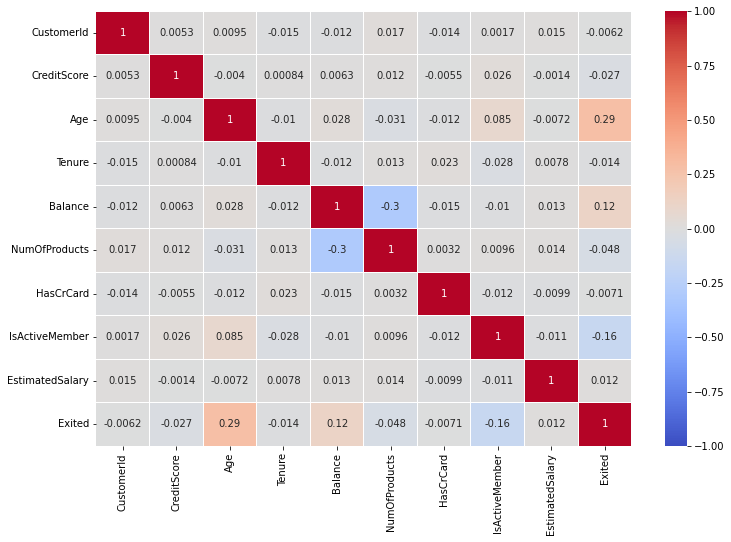

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, linewidths=0.1)
pass

Сильных линейных взаимосвязей в признаках нет

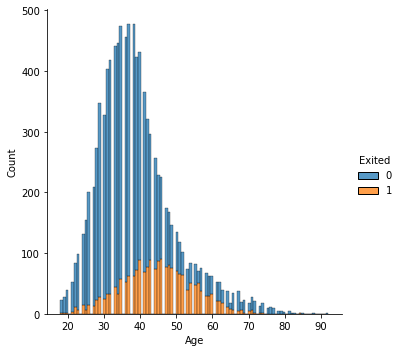

In [59]:
sns.displot(data=df, x='Age', hue='Exited', multiple='stack', bins=100)
pass

Из данного графика видно, что распределение возраста ушедших клиентов смещено вправо относительно всех клиентов. Из этого можно сделать предположение о том, что рекламная компания или пользовательские условия больше подходят людям более молодой возрастной категории.

In [77]:
print(f"Медианный возраст клиента: {df['Age'].median()}\nМедианный возраст ушедшего клиента: {df[df['Exited'] == 1]['Age'].median()}")

Медианный возраст клиента: 37.0
Медианный возраст ушедшего клиента: 45.0


In [67]:
df_age_exited = (df[df['Exited'] == 1])[['Age']]
df_age_no_exited = (df[df['Exited'] == 0])[['Age']]

In [70]:
from scipy import stats

_, p_val = stats.ttest_ind(df_age_exited, df_age_no_exited)

In [76]:
p_val

array([1.23993131e-186])

In [ ]:
stats.ttest_ind()

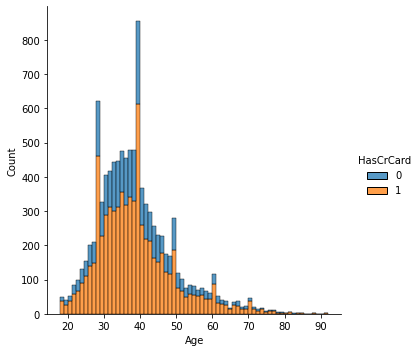

In [27]:
sns.displot(data=df, x='Age', hue='HasCrCard', multiple='stack')

In [40]:
df_age = df.groupby(['Age']).count()[['CustomerId']]

In [52]:
df_age.sort_values('CustomerId', inplace=True)

In [54]:
df_age.tail(10).sort_index()

,CustomerId
Age,
31,404
32,418
33,442
34,447
35,474
36,456
37,478
38,477
39,423


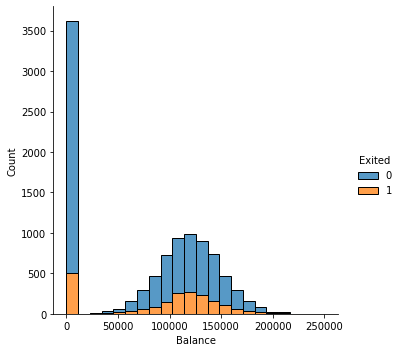

In [11]:
sns.displot(data=df, x='Balance', hue='Exited', multiple='stack')
pass

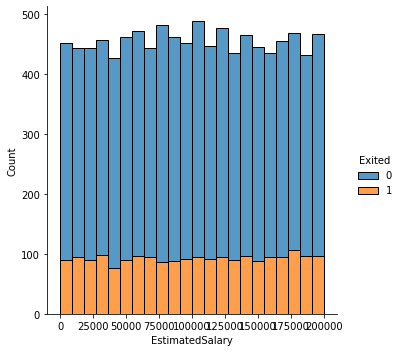

In [12]:
sns.displot(data=df, x='EstimatedSalary', hue='Exited', multiple='stack')
pass

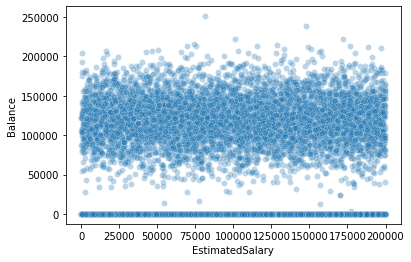

In [13]:
sns.scatterplot(data=df, x='EstimatedSalary', y='Balance', alpha=0.3)

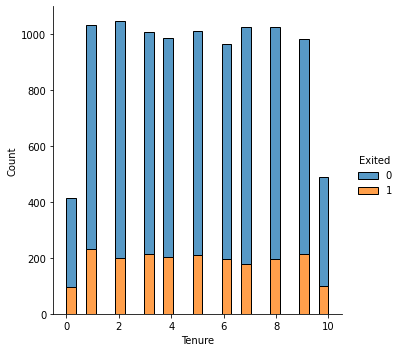

In [14]:
sns.displot(data=df, x='Tenure', hue='Exited', multiple='stack')
pass

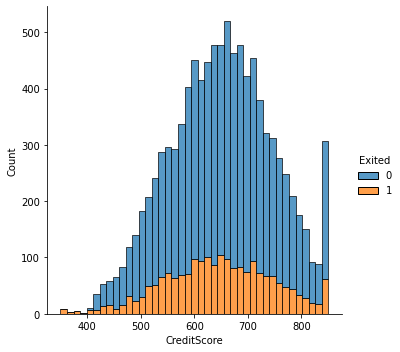

In [15]:
sns.displot(data=df, x='CreditScore', hue='Exited', multiple='stack')
pass

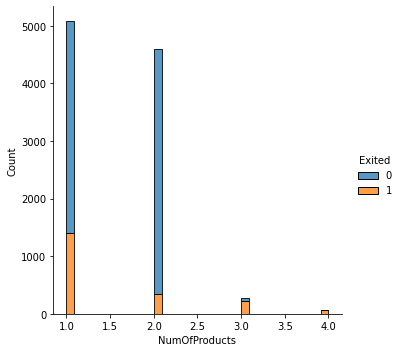

In [16]:
sns.displot(data=df, x='NumOfProducts', hue='Exited', multiple='stack')

По графику видно, что большинство пользователей продуктов под номерами 3 и 4 уходят из банка. Можно предположить, что качество данных продуктов разочаровывает клиентов. Либо это специфика данного типа продукта. 

In [17]:
df_country = df[df['Exited'] == 1].groupby(['Geography']).count()[['Exited']]

In [18]:
df_country['Not_Exited'] = df[df['Exited'] == 0].groupby(['Geography']).count()[['Exited']]

In [19]:
df_country['ratio'] = df_country['Exited'] / df_country['Not_Exited']

In [20]:
df_country.reset_index(inplace=True)

In [21]:
df_country['Amount'] = df_country['Exited'] + df_country['Not_Exited']

In [22]:
df_country

,Geography,Exited,Not_Exited,ratio,Amount
0,France,810,4204,0.192674,5014
1,Germany,814,1695,0.480236,2509
2,Spain,413,2064,0.200097,2477


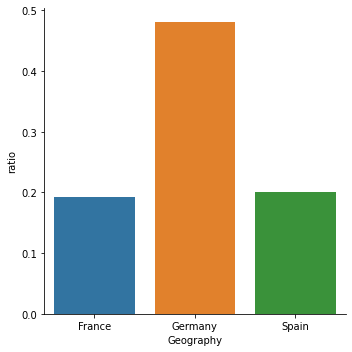

In [23]:
sns.catplot(data=df_country, x='Geography', y='ratio', kind='bar')
pass

Процентное соотношение ушедших клиентов в Германии самое высокое.

In [24]:
df_gender = pd.DataFrame()
df_gender['Exited'] = df[df['Exited'] == 1].groupby('Gender').count()['CustomerId']
df_gender['No_Exited'] = df[df['Exited'] == 0].groupby('Gender').count()['CustomerId']
df_gender['All'] = df.groupby('Gender').count()['CustomerId']
df_gender['Exited_ratio'] = df_gender['Exited'] / df_gender['All']
df_gender.reset_index(inplace=True)

In [25]:
df_gender

,Gender,Exited,No_Exited,All,Exited_ratio
0,Female,1139,3404,4543,0.250715
1,Male,898,4559,5457,0.164559


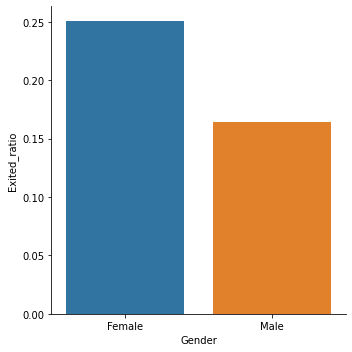

In [26]:
sns.catplot(data=df_gender, x='Gender', y='Exited_ratio', kind='bar')
pass

Процентное соотношение ушедших клиентов женского пола выше чем мужского.